# Hypothèse : Les budgets de production plus élevés conduisent à des recettes plus élevées.

#### Importation des bibliothèques nécessaires

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Chargement des données

In [3]:
# Les chemins vers les fichiers CSV
fichier_credits = 'data/credits.csv'
fichier_movie = 'data/movies_metadata.csv'

# Lecture des fichiers CSV
movies_metadata = pd.read_csv(fichier_movie, sep=",", low_memory=False)
credits = pd.read_csv(fichier_credits, sep=",", low_memory=False)

credits["cast"] = credits["cast"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

## Aperçu des données

In [4]:
print("Aperçu des données Ratings :")
credits.head()

Aperçu des données Ratings :


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [5]:
print("\nAperçu des données Movies :")
movies_metadata.head()


Aperçu des données Movies :


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Nettoyage et préparation des données

In [8]:
# Filtrage des colonnes nécessaires
data_movie = movies_metadata[['id', 'revenue', 'budget']]


# Suppression des valeurs manquantes
data = data_movie.dropna()
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data = data[(data['budget'] > 0) & (data['revenue'] > 0)]
data.head()

C:\Users\risto\AppData\Local\Temp\ipykernel_2644\1059087036.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
C:\Users\risto\AppData\Local\Temp\ipykernel_2644\1059087036.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')


,id,revenue,budget
0,862,373554033.0,30000000
1,8844,262797249.0,65000000
3,31357,81452156.0,16000000
5,949,187436818.0,60000000
8,9091,64350171.0,35000000


In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

explained_variance = pca.explained_variance_ratio_

pca_optimal = PCA(n_components=2)
pca_optimal_result = pca_optimal.fit_transform(data_scaled)

Contribution des variables aux composantes principales :
                    id   revenue    budget
Composante 1 -0.005170  0.707049  0.707145
Composante 2  0.999641  0.022238 -0.014927


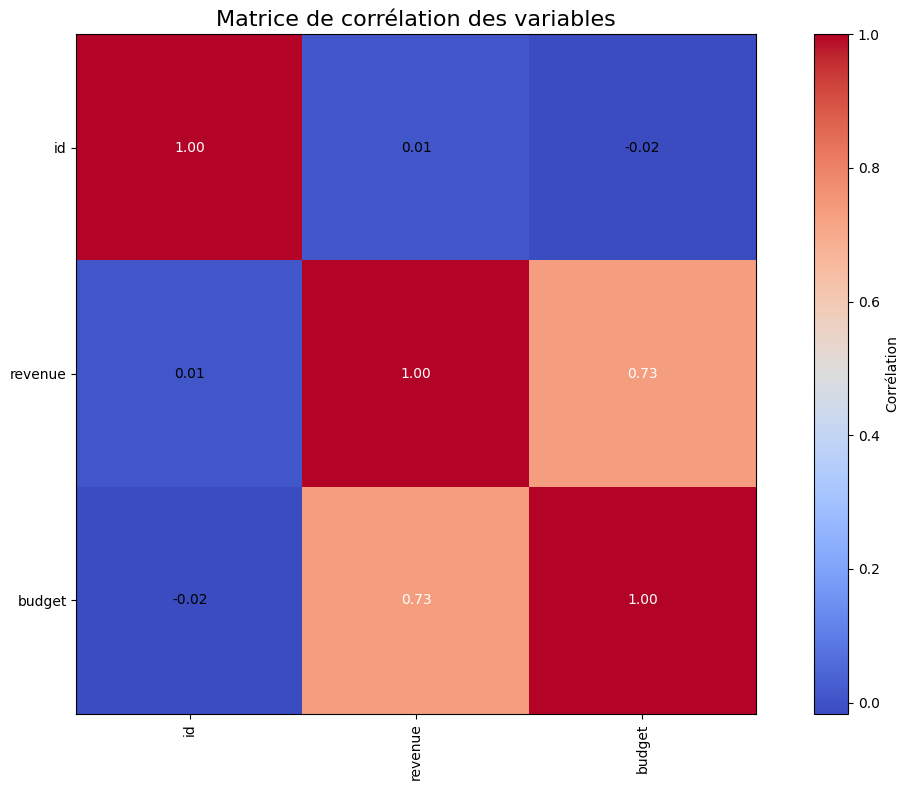

Matrice de corrélation :
               id   revenue    budget
id       1.000000  0.010916 -0.016253
revenue  0.010916  1.000000  0.730271
budget  -0.016253  0.730271  1.000000


In [10]:
components_contribution = pd.DataFrame(
    pca_optimal.components_,
    columns=data.columns,
    index=[f"Composante {i+1}" for i in range(2)]
)

print("Contribution des variables aux composantes principales :")
print(components_contribution)

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Corrélation')
plt.title('Matrice de corrélation des variables', fontsize=16)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black' if abs(correlation_matrix.iloc[i, j]) < 0.5 else 'white')

plt.show()

print("Matrice de corrélation :")
print(correlation_matrix)

In [11]:
# Filtrage des colonnes nécessaires
data_movie = movies_metadata[['release_date', 'id', 'revenue', 'budget']]


# Suppression des valeurs manquantes
data = data_movie.dropna()
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data = data[(data['budget'] > 0) & (data['revenue'] > 0)]
data.head()

C:\Users\risto\AppData\Local\Temp\ipykernel_2644\1011006389.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
C:\Users\risto\AppData\Local\Temp\ipykernel_2644\1011006389.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')


,release_date,id,revenue,budget
0,1995-10-30,862,373554033.0,30000000
1,1995-12-15,8844,262797249.0,65000000
3,1995-12-22,31357,81452156.0,16000000
5,1995-12-15,949,187436818.0,60000000
8,1995-12-22,9091,64350171.0,35000000


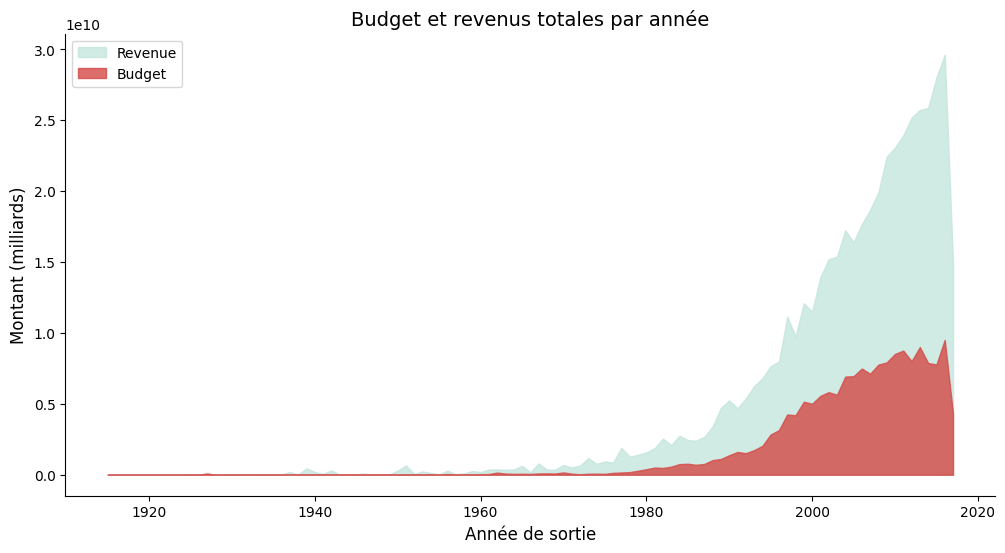

In [18]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Remove rows with invalid dates
data = data.dropna(subset=['release_date'])

data['release_year'] = data['release_date'].dt.year
data_agg = data.groupby('release_year')[['budget', 'revenue']].sum().reset_index()

# Plot aggregated data with budget on top of revenue
plt.figure(figsize=(12, 6))

# Revenue area (plotted first) with blue color
plt.fill_between(data_agg['release_year'], data_agg['revenue'], color='#c5e5de', alpha=0.8, label='Revenue')

# Budget area (plotted on top of revenue) with red color
plt.fill_between(data_agg['release_year'], data_agg['budget'], color='#d54946', alpha=0.8, label='Budget')

# Adding labels, title, and legend
plt.xlabel('Année de sortie', fontsize=12)
plt.ylabel('Montant (milliards)', fontsize=12)
plt.title('Budget et revenus totales par année', fontsize=14)
plt.legend()

# Adjusting spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Ticks and grid
plt.gca().tick_params(left=True, bottom=True)
plt.grid(False)

# Display the plot
plt.show()

